# 三消游戏算法

In [1]:
import random

In [2]:
def show_image(puzzle):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.matshow(np.array(puzzle))

    plt.show()

## 初始化棋盘

In [3]:
length = 9
width = 9

puzzle = [[0 for point_x in range(length)] for point_y in range(width)]
puzzle

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

自上到下，自左到右地填充格子

为避免出现三连格子，当被填充格子左边两个为同色时，随机颜色中就去掉这个相同的颜色，上方同理。

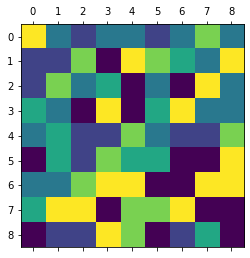

In [4]:
color = 6

def fill_block(puzzle, point_x, point_y):
    # 可使用的颜色
    ready_color = set(range(color))
    # 上边两个格子同色，去除这个颜色
    if point_x-2 >= 0 and puzzle[point_x-1][point_y] == puzzle[point_x-2][point_y]:
        ready_color.remove(puzzle[point_x-1][point_y])
    # 左边两个格子同色
    if point_y-2 >= 0 and puzzle[point_x][point_y-1] == puzzle[point_x][point_y-2]:
        # 上一步骤中没有去除这个颜色，现在去除
        if puzzle[point_x][point_y-1] in ready_color:
            ready_color.remove(puzzle[point_x][point_y-1])
    # 随机填充一种颜色
    puzzle[point_x][point_y] = random.choice(list(ready_color))
    return puzzle

def random_init(puzzle):
    # 逐行逐列填充
    for point_x in range(width):
        for point_y in range(length):
            puzzle = fill_block(puzzle, point_x, point_y)
    return puzzle

puzzle = random_init(puzzle)      
show_image(puzzle)

计算可消除的格子

对某一格子，计算与它相邻的格子是否同色，可以被消除。

这里不打算计算同色格子的连通性。

每次对该格同行和同列，使用一个三格宽的遍历，检查是否同色。如果同色，将这三个格子的坐标计入一个列表。

最后对这个列表去重，得到所有被消除格子的坐标。

In [5]:
def match_blocks(puzzle, point_x, point_y):
    matched = list()
    for i in range(length-2):
        if puzzle[point_x][i] - puzzle[point_x][i+1] == puzzle[point_x][i+1] - puzzle[point_x][i+2] == 0:
            matched += [(point_x, i), (point_x, i+1), (point_x, i+2)]
    for i in range(width-2):
        if puzzle[i+1][point_y] - puzzle[i][point_y] == puzzle[i+2][point_y] - puzzle[i+1][point_y] == 0:
            matched += [(i, point_y), (i+1, point_y), (i+2, point_y)]
    return matched

输入移动的格子坐标，和它要移动的方向。

将与之交换的格子都做匹配处理。

In [6]:
def match_puzzle(puzzle, point_x, point_y, arrow):
    if arrow == 'left':
        x1, y1, x2, y2 = point_x, point_y, point_x, point_y-1
    elif arrow == 'right':
        x1, y1, x2, y2 = point_x, point_y, point_x, point_y+1
    elif arrow == 'up':
        x1, y1, x2, y2 = point_x-1, point_y, point_x, point_y
    elif arrow == 'down':
        x1, y1, x2, y2 = point_x+1, point_y, point_x, point_y
    puzzle[x1][y1], puzzle[x2][y2] = puzzle[x2][y2], puzzle[x1][y1]
    matched = match_blocks(puzzle, x1, y1) + match_blocks(puzzle, x2, y2)
    if len(matched) == 0:
        puzzle[x1][y1], puzzle[x2][y2] = puzzle[x2][y2], puzzle[x1][y1]
    return list(set(matched))

[(7, 3), (7, 2), (7, 1)]


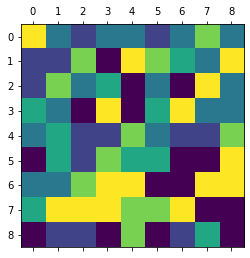

In [7]:
point_x = 8
point_y = 3
arrow = 'up'

matched = match_puzzle(puzzle, point_x, point_y, arrow)

print(matched)
show_image(puzzle)

死局监测

遍历当前棋盘，如果能发现一组可被消除的格子，则表示当前棋盘不是死局。

一共有两类，可以构成三连

一种是相邻的两个同色格子

[相邻同色]()

一种是空一格的两个同色格子

[空一格同色]()

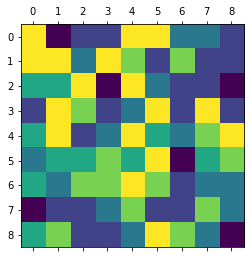

In [8]:
# 一个新的puzzle
puzzle = random_init(puzzle)      
show_image(puzzle)

如果发现一组，立即返回 `False`，结束其他检测，都没有发现，则返回 `True`。

In [11]:
def is_dead(puzzle):
    # 不同方向可以将棋盘镜像再做检测
    puzzle_mirror = [row[::-1] for row in puzzle]
    # 不同角度可以将棋盘旋转90度再做检测
    puzzle_transfor = list(map(list,zip(*puzzle)))

    # 寻找相邻两个同色格子: [口口]
    if block_status_1(puzzle):
        return False
    if block_status_1(puzzle_mirror):
        return False
    if block_status_1(puzzle_transfor):
        return False
    # 寻找空一格两个同色格子: [口X口]
    if block_status_2(puzzle):
        return False
    if block_status_2(puzzle_transfor):
        return False

    return True

检查这些格子周围是否有能凑成一组的格子，如果能返回 `True`，不能返回 `False`。

In [ ]:
def block_status_1(puzzle):
    for point_x in range(self.width):
        for point_y in range(self.length-1):
            if puzzle[point_x][point_y] == puzzle[point_x][point_y+1]:
                if point_x >= 1 and point_y >= 1 and puzzle[point_x-1][point_y-1] == puzzle[point_x][point_y]:
                    return True
                if point_y >= 2 and puzzle[point_x][point_y-2] == puzzle[point_x][point_y]:
                    return True
                if point_x+1 < self.length and point_y <= 1 and puzzle[point_x+1][point_y-1] == puzzle[point_x][point_y]:
                    return True
    return False

